# Sheet 4

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## 3 QDA
### (a)

In [6]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

def normal_distrib(data,x):
    mean = np.mean(data)
    std = np.std(data)

    nd = 1 / (np.sqrt(2 * np.pi) * std) * np.exp(- (x - mean)**2 / (2 * std**2))
    return nd

In [18]:
zeros = pts[labels==0]
ones = pts[labels==1]

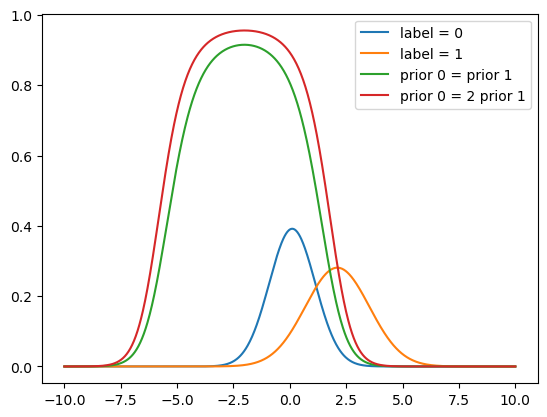

In [22]:
x = np.linspace(-10,10,1000)
normal_0 = normal_distrib(zeros,x)
normal_1 = normal_distrib(ones,x)

#b
prior_0 = 0.5
prior_1 = 0.5
posterior_0b1 = (normal_0 * prior_0) / (normal_0 * prior_0 + normal_1 * prior_1)

prior_0 = 2 / 3
prior_1 = 1 / 3
posterior_0b2 = (normal_0 * prior_0) / (normal_0 * prior_0 + normal_1 * prior_1)


plt.plot(x,normal_0,label="label = 0")
plt.plot(x,normal_1,label="label = 1")
plt.plot(x,posterior_0b1,label="prior 0 = prior 1")
plt.plot(x,posterior_0b2,label="prior 0 = 2 prior 1")
plt.legend()

### (b)

## 4 Trees and Random Forests

### (b)

Best Gini Split: 1.7325847083983494
Best Entropy Split: 1.8174885383195665
Best Missclassification Split: 0.6174029972036599


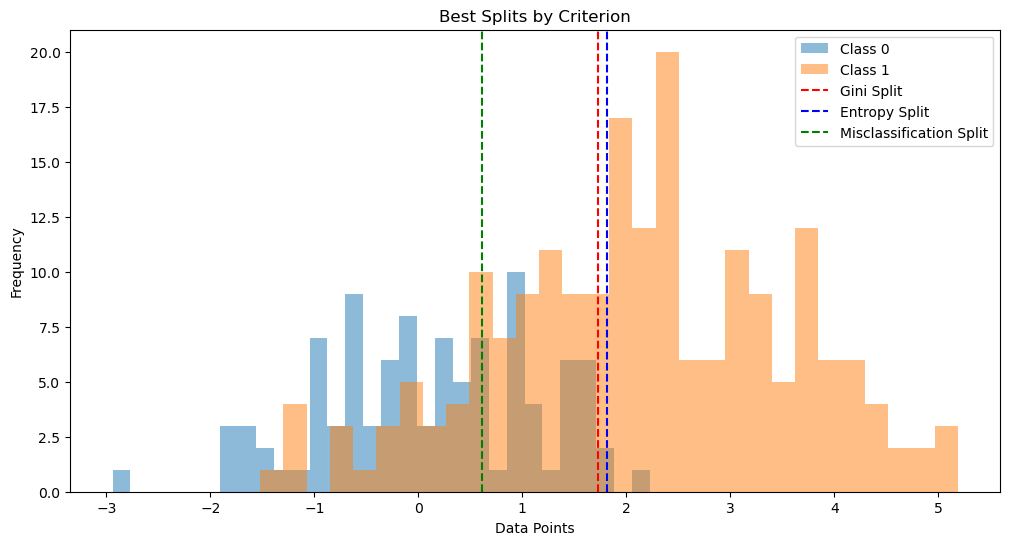

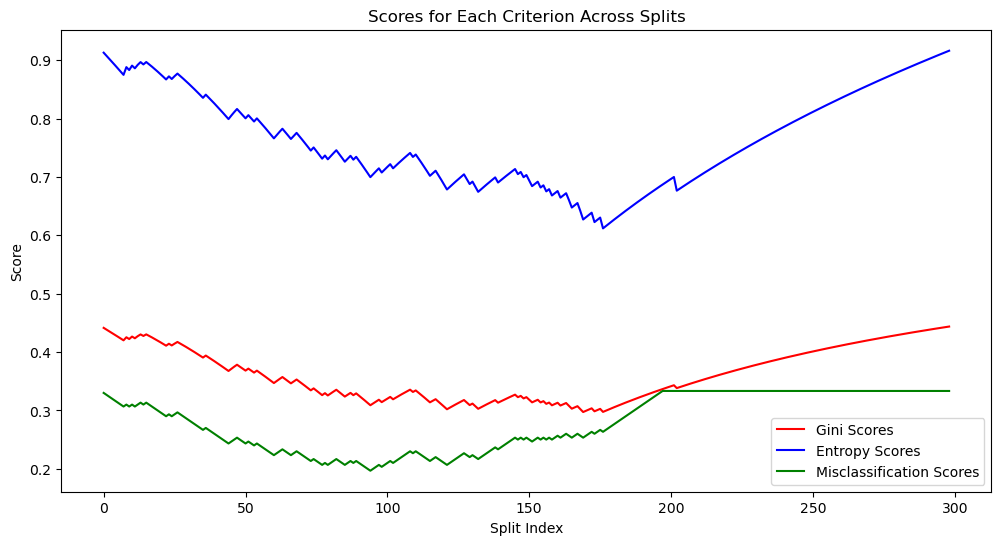

In [24]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# Sort the points to easily split them
sort_idx = np.argsort(pts)
pts_sorted = pts[sort_idx]
labels_sorted = labels[sort_idx]

# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate
def gini(p):
    return 1 - np.sum(p**2)

def entropy(p):
    return -np.sum(p * np.log2(p, where=p > 0))

def misclassification(p):
    return 1 - np.max(p)


def probabilities(partition):
    # divide counts by size of dataset to get cluster probabilites
    return np.unique(partition, return_counts=True)[1] / len(partition)

# def compute_split_measure(l, l0, l1, method):
#     p0 = probabilities(l0)
#     p1 = probabilities(l1)
#     p = probabilities(l)
#     return method(p) - (len(l0) * method(p0) + len(l1) * method(p1)) / (len(l))

def compute_split_measure(l, l0, l1, method):
    p0 = probabilities(l0)
    p1 = probabilities(l1)
    # Weighted average impurity of the partitions
    return (len(l0) * method(p0) + len(l1) * method(p1)) / len(l)

# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one

def find_best_split(pts, labels, measure):
    best_split = None
    best_score = float('inf')  # We minimize the score
    scores = []

    # Iterate over all possible splits
    for i in range(1, len(pts)):
        l0, l1 = labels[:i], labels[i:]
        l = labels
        score = compute_split_measure(l, l0, l1, measure)
        scores.append(score)

        if score < best_score:
            best_score = score
            best_split = pts[i]

    return best_split, scores

# Identify the best splits for each criterion
gini_split, gini_scores = find_best_split(pts_sorted, labels_sorted, gini)
entropy_split, entropy_scores = find_best_split(pts_sorted, labels_sorted, entropy)
misclassification_split, misclassification_scores = find_best_split(pts_sorted, labels_sorted, misclassification)
# TODO: Then, Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)
# Plot the results
plt.figure(figsize=(12, 6))

# Plot the histogram of data points
plt.hist(pts_sorted[labels_sorted == 0], bins=30, alpha=0.5, label='Class 0')
plt.hist(pts_sorted[labels_sorted == 1], bins=30, alpha=0.5, label='Class 1')

# Add vertical lines for the splits
plt.axvline(gini_split, color='red', linestyle='--', label='Gini Split')
plt.axvline(entropy_split, color='blue', linestyle='--', label='Entropy Split')
plt.axvline(misclassification_split, color='green', linestyle='--', label='Misclassification Split')

print(f"Best Gini Split: {gini_split}")
print(f"Best Entropy Split: {entropy_split}")
print(f"Best Missclassification Split: {misclassification_split}")

plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Frequency')
plt.title('Best Splits by Criterion')
plt.show()

# Visualize scores for each criterion
plt.figure(figsize=(12, 6))
plt.plot(gini_scores, label='Gini Scores', color='red')
plt.plot(entropy_scores, label='Entropy Scores', color='blue')
plt.plot(misclassification_scores, label='Misclassification Scores', color='green')
plt.xlabel('Split Index')
plt.ylabel('Score')
plt.title('Scores for Each Criterion Across Splits')
plt.legend()
plt.show()

### (b)

In [7]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)

In [8]:
from sklearn.ensemble import RandomForestClassifier

# TODO: train a random forest classifier for each combination of specified hyperparameters 
#       and evaluate the performances on the validation set.

In [9]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set